# Import necessary packages

In [ ]:
# Load the necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats  
from scipy.stats import binom
from scipy.stats import poisson
from google.colab import drive
from datetime import datetime

drive.mount('/content/drive')
%matplotlib inline

Mounted at /content/drive


# PART C

**CONTEXT:** Company X is a EU online publisher focusing on the startups industry. The company specifically reports on the business related to
technology news, analysis of emerging trends and profiling of new tech businesses and products. Their event i.e. Startup Battlefield is the world’s
pre-eminent startup competition. Startup Battlefield features 15-30 top early stage startups pitching top judges in front of a vast live audience,
present in person and online.

In [ ]:
# Read the csv file, 
Data = pd.read_csv('/content/drive/My Drive/AIML/Applied Statistic/Project/CompanyX_EU.csv')
# show top 5 data points 
Data.head()

,Startup,Product,Funding,Event,Result,OperatingState
0,2600Hz,2600hz.com,NaN,Disrupt SF 2013,Contestant,Operating
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed
2,3DPrinterOS,3dprinteros.com,NaN,Disrupt SF 2016,Contestant,Operating
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating
4,42 Technologies,42technologies.com,NaN,Disrupt NYC 2013,Contestant,Operating


In [ ]:
# check the datatypes of each attributes
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Startup         662 non-null    object
 1   Product         656 non-null    object
 2   Funding         448 non-null    object
 3   Event           662 non-null    object
 4   Result          662 non-null    object
 5   OperatingState  662 non-null    object
dtypes: object(6)
memory usage: 31.2+ KB


In [ ]:
# Check for null values in the attributes.
pd.DataFrame( Data.isnull().sum(), columns= ['Number of missing values'])

,Number of missing values
Startup,0
Product,6
Funding,214
Event,0
Result,0
OperatingState,0


In [ ]:
# Drop the null values.
Data.dropna(inplace=True)  # Drops all the rows that have atleast one missing values
pd.DataFrame( Data.isnull().sum(), columns= ['Number of missing values'])


,Number of missing values
Startup,0
Product,0
Funding,0
Event,0
Result,0
OperatingState,0


In [ ]:
# Convert the 'Funding' features to a numerical value
Data.loc[:,'Funds_in_million'] = Data['Funding'].apply(lambda x: float(x[1:-1])/1000 if x[-1] == 'K' else (float(x[1:-1])*1000 if x[-1] == 'B' else float(x[1:-1])))

In [ ]:
Data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 446 entries, 1 to 661
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Startup           446 non-null    object 
 1   Product           446 non-null    object 
 2   Funding           446 non-null    object 
 3   Event             446 non-null    object 
 4   Result            446 non-null    object 
 5   OperatingState    446 non-null    object 
 6   Funds_in_million  446 non-null    float64
dtypes: float64(1), object(6)
memory usage: 27.9+ KB


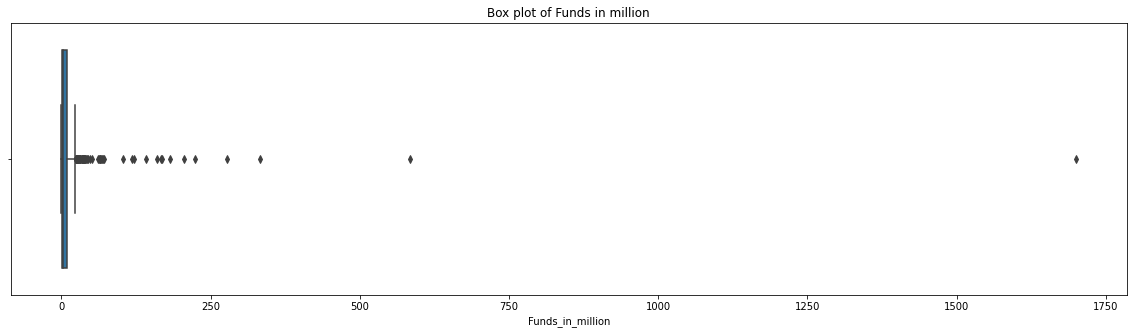

In [ ]:
#Plot box plot for funds in million.
plt.figure(figsize=(20,5))
plt.title('Box plot of Funds in million')
ax = sns.boxplot(x=Data['Funds_in_million'])   # box plot

In [ ]:
# Check the number of outliers greater than the upper fence. 

Q3 = Data['Funds_in_million'].quantile(0.75)
Q1 = Data['Funds_in_million'].quantile(0.25)
IQR = Q3 - Q1
upper_fence = Q3 + 1.5 * IQR

# number of outliers greater than the upper fence
num_outliers = len(Data[Data['Funds_in_million'] > upper_fence])

print("Number of outliers greater than upper fence:", num_outliers)


Number of outliers greater than upper fence: 60


In [ ]:
# Check frequency of the OperatingState features classes.
Data['OperatingState'].value_counts()

Operating    319
Acquired      66
Closed        57
Ipo            4
Name: OperatingState, dtype: int64

**Statistical Analysis: **

1. Is there any significant difference between Funds raised by companies that are still operating vs companies that closed down?

P-Value: 0.007898898722704632
we reject the null hypothesis and conclude that there is a significant difference between the funds raised by startups operating and closed.


# ***Write the null hypothesis and alternative hypothesis***. 

The **null hypothesis** is that there is no significant difference in the funds raised by companies that are still operating versus companies that have closed down.

The **alternative hypothesis** is that there is a significant difference in the funds raised by companies that are still operating versus companies that have closed down.

In [ ]:
# Test for significance and conclusion
alpha = 0.05
operating_funds = Data[Data['OperatingState'] == 'Operating']['Funds_in_million']
closed_funds = Data[Data['OperatingState'] == 'Closed']['Funds_in_million']

t_statistic, p_value = ttest_ind(operating_funds, closed_funds, equal_var=False)

print('P-Value:', p_value)

if p_value < alpha:
  print("we reject the null hypothesis and conclude that there is a significant difference between the funds raised by startups operating and closed.")
else:
  print("we accpet the null hypothesis and conclude that there is no significant difference in the funds raised by  startups that are operating versus closed.")


P-Value: 0.007898898722704632
we reject the null hypothesis and conclude that there is a significant difference between the funds raised by startups operating and closed.


In [ ]:
# Make a copy of the original data frame.
# Read the csv file, 
df = pd.read_csv('/content/drive/My Drive/AIML/Applied Statistic/Project/CompanyX_EU.csv')
dfCopy = df.copy();
dfCopy.head()

DataCopy = Data.copy();

In [ ]:
# Check frequency distribution of Result variables. 
dfCopy['Result'].value_counts()

Contestant         488
Finalist            84
Audience choice     41
Winner              26
Runner up           23
Name: Result, dtype: int64

In [ ]:
# Check frequency distribution of Result variables. 
DataCopy['Result'].value_counts()

Contestant         312
Finalist            65
Audience choice     25
Winner              25
Runner up           19
Name: Result, dtype: int64

In [ ]:
# Calculate percentage of winners that are still operating and percentage of contestants that are still operating 

df_filtered = dfCopy[dfCopy['Result'].isin(['Winner', 'Contestant'])]

# calculate percentage of winners that are still operating
winners_operating = df_filtered[df_filtered['Result'] == 'Winner']['OperatingState'].value_counts(normalize=True)['Operating'] * 100

# calculate percentage of contestants that are still operating
contestants_operating = df_filtered[df_filtered['Result'] == 'Contestant']['OperatingState'].value_counts(normalize=True)['Operating'] * 100

print("winners still operating: ",winners_operating.round(2),"%")
print("contestants still operating:",contestants_operating.round(2),"%")


winners still operating:  73.08 %
contestants still operating: 68.03 %


In [ ]:
# Calculate percentage of winners that are still operating and percentage of contestants that are still operating 

DataCopy_filtered = DataCopy[DataCopy['Result'].isin(['Winner', 'Contestant'])]

# calculate percentage of winners that are still operating
w_operating = DataCopy_filtered[DataCopy_filtered['Result'] == 'Winner']['OperatingState'].value_counts(normalize=True)['Operating'] * 100

# calculate percentage of contestants that are still operating
c_operating = DataCopy_filtered[DataCopy_filtered['Result'] == 'Contestant']['OperatingState'].value_counts(normalize=True)['Operating'] * 100

print("winners still operating: ",w_operating.round(2),"%")
print("contestants still operating:",c_operating.round(2),"%")


winners still operating:  72.0 %
contestants still operating: 68.59 %


# Write your hypothesis comparing the proportion of companies that are operating between winners and contestants:

**Null hypothesis** No significant difference in the proportion of startups  that are operating between winners and contestants.

**Alternative hypothesis** The proportion of startups that are operating is significantly different between winners and contestants.

In [ ]:
# Test for significance and conclusion with all data including null values of funding.
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df_filtered['Result'], df_filtered['OperatingState'])

# Print the contingency table
print(contingency_table)

# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(p)

# Assume significance value 
alpha = 0.05

if p < alpha:
    print("Reject null hypothesis. There is a significant difference in the proportion of companies that are operating between winners and contestants.")
else:
    print("Fail to reject null hypothesis. There is no significant difference in the proportion of companies that are operating between winners and contestants.")



OperatingState  Acquired  Closed  Ipo  Operating
Result                                          
Contestant            62      90    4        332
Winner                 7       0    0         19
0.03181839969026595
Reject null hypothesis. There is a significant difference in the proportion of companies that are operating between winners and contestants.


In [ ]:
# Test for significance and conclusion with dataframe removing funding null values.

# Create a contingency table
contingency_table = pd.crosstab(DataCopy_filtered['Result'], DataCopy_filtered['OperatingState'])

# Print the contingency table
print(contingency_table)

# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(p)

# Assume significance value 
alpha = 0.05

if p < alpha:
    print("Reject null hypothesis. There is a significant difference in the proportion of companies that are operating between winners and contestants.")
else:
    print("Fail to reject null hypothesis. There is no significant difference in the proportion of companies that are operating between winners and contestants.")



OperatingState  Acquired  Closed  Ipo  Operating
Result                                          
Contestant            45      50    3        214
Winner                 7       0    0         18
0.0702933702746471
Fail to reject null hypothesis. There is no significant difference in the proportion of companies that are operating between winners and contestants.


In [ ]:
disrupt_events = dfCopy[dfCopy['Event'].str.contains('disrupt', case=False)]

disrupt_events_gt_2013 = disrupt_events[disrupt_events['Event'].str[-4:].astype(int) >= 2013]

print(len(disrupt_events_gt_2013))
disrupt_events_gt_2013.head(10)

276


,Startup,Product,Funding,Event,Result,OperatingState
0,2600Hz,2600hz.com,NaN,Disrupt SF 2013,Contestant,Operating
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed
2,3DPrinterOS,3dprinteros.com,NaN,Disrupt SF 2016,Contestant,Operating
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating
4,42 Technologies,42technologies.com,NaN,Disrupt NYC 2013,Contestant,Operating
13,Agrilyst,agrilyst.com,$1M,Disrupt SF 2015,Winner,Operating
14,Aiden,aiden.ai,$750K,Disrupt London 2016,Contestant,Operating
16,Aircall,aircall.io,$11.6M,Disrupt SF 2015,Contestant,Operating
18,AirHelp,airhelp.com,$12.2M,Disrupt NYC 2014,Contestant,Operating
19,AirWander,airwander.com,NaN,Disrupt London 2016,Contestant,Operating
